In [49]:
import pandas as pd

case_df = pd.DataFrame(pd.read_excel("../data/covid_il_case.xlsx"))
case_df

,Date,Case
0,2021-01-12,6591
1,2021-01-13,5743
2,2021-01-14,6766
3,2021-01-15,6571
4,2021-01-16,5109
...,...,...
61,2021-03-14,1455
62,2021-03-15,868
63,2021-03-16,1982
64,2021-03-17,1513


<AxesSubplot:xlabel='Date'>

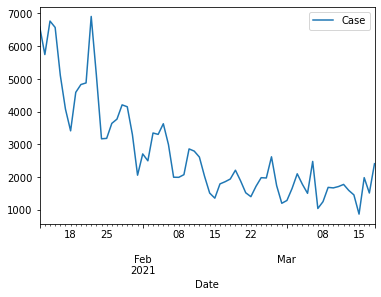

In [50]:
line = case_df.plot.line(x = 'Date', y = 'Case')
line

In [51]:
import requests
covid_vaccination_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv'

vaccination_response = requests.get(covid_vaccination_url)
vaccination_response.raise_for_status() # raise exception if invalid response
vaccination_response

<Response [200]>

In [52]:
import pandas as pd
vaccination_df = pd.read_csv(covid_vaccination_url)
vaccination_df.head(10)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN
5,2021-01-17,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7509.0,1531.0,NaN
6,2021-01-18,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7517.0,1533.0,NaN
7,2021-01-19,Alabama,130795.0,444650.0,114319.0,0.33,2.67,16346.0,2.33,9.07,7557.0,7523.0,1534.0,0.294
8,2021-01-20,Alabama,139200.0,483275.0,121113.0,0.37,2.84,17956.0,2.47,9.86,8405.0,7880.0,1607.0,0.288
9,2021-01-21,Alabama,165919.0,493125.0,144429.0,0.44,3.38,21345.0,2.95,10.06,26719.0,10517.0,2145.0,0.336


In [53]:
illinois = vaccination_df['location'] == 'Illinois'

illinois_vaccination = vaccination_df[illinois]

illinois_vaccination = illinois_vaccination.reset_index()

In [54]:
illinois_drop = illinois_vaccination.drop(columns = ['total_distributed','people_vaccinated','people_fully_vaccinated_per_hundred','total_vaccinations_per_hundred', 'location', 'index',
                       'people_fully_vaccinated','people_vaccinated_per_hundred','total_vaccinations_per_hundred','people_fully_vaccinated','people_vaccinated_per_hundred',
                                    'people_vaccinated_per_hundred','distributed_per_hundred','daily_vaccinations_raw','daily_vaccinations','daily_vaccinations_per_million','share_doses_used'], axis = 1)
vaccination_final = illinois_drop.dropna()
vaccination_final.head(10)

,date,total_vaccinations
0,2021-01-12,347005.0
1,2021-01-13,365859.0
2,2021-01-14,403666.0
3,2021-01-15,437765.0
7,2021-01-19,525261.0
8,2021-01-20,539926.0
9,2021-01-21,570527.0
10,2021-01-22,607502.0
11,2021-01-23,654752.0
12,2021-01-24,699072.0


<AxesSubplot:xlabel='date'>

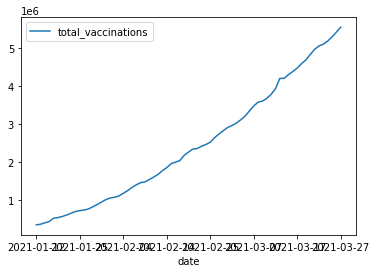

In [55]:
line = vaccination_final.plot.line(x = 'date', y = 'total_vaccinations')
line

In [56]:
merged_df = pd.concat([case_df, vaccination_final], axis = 1)
merged_df = merged_df.drop(columns = 'date')
merged_df.head(20)

,Date,Case,total_vaccinations
0,2021-01-12,6591.0,347005.0
1,2021-01-13,5743.0,365859.0
2,2021-01-14,6766.0,403666.0
3,2021-01-15,6571.0,437765.0
4,2021-01-16,5109.0,NaN
5,2021-01-17,4077.0,NaN
6,2021-01-18,3412.0,NaN
7,2021-01-19,4588.0,525261.0
8,2021-01-20,4827.0,539926.0
9,2021-01-21,4876.0,570527.0


[]

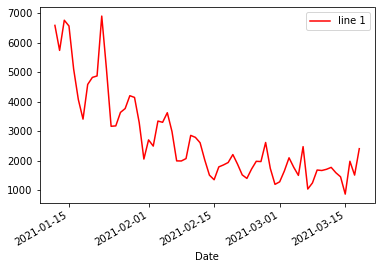

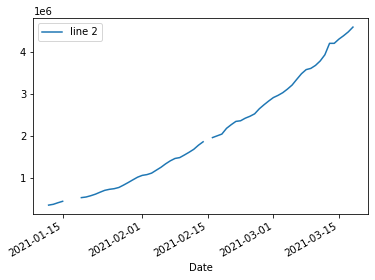

In [57]:
import matplotlib.pyplot as plt 

df1 = merged_df.plot('Date', 'Case', label = "line 1", color = 'Red') 
df2 = merged_df.plot('Date', 'total_vaccinations', label = "line 2") 

ax = df1.plot()

final = df2.plot(ax=ax)
final

<AxesSubplot:>

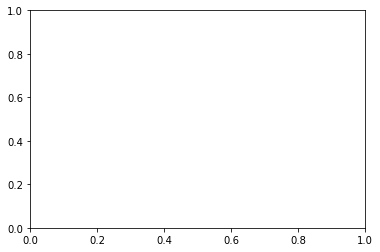

In [58]:
ax = plt.gca()
ax

AttributeError: 'DataFrame' object has no attribute 'legend'

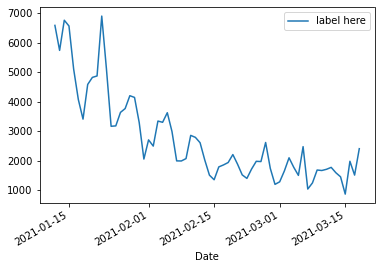

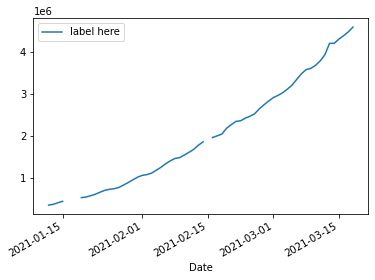

In [59]:
import matplotlib.pyplot as plt
merged_df.plot('Date', 'Case', label='label here')
merged_df.plot('Date', 'total_vaccinations', label='label here')
merged_df.legend(loc='best')
merged_df.show()